# Looking at Arctic temperature anomalies in April (1850-2023)
Here we will create a workflow to download, open, clean, and plot temperature data using Python. Data as .csv are from NOAA's [Climate at a Glance](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/) dashboard.

## Data Citation
NOAA National Centers for Environmental information, Climate at a Glance: Global Time Series, published January 2024, retrieved on January 22, 2024 from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

In [10]:
# Import Python libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [11]:
# Define url to data (Arctic/April/1850-2023)
arctic_april_temp_url = ('https://www.ncei.noaa.gov/access/monitoring/'
                         'climate-at-a-glance/global/time-series/arctic/'
                         'land_ocean/1/4/1850-2023/data.csv')
arctic_april_temp_url

'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/arctic/land_ocean/1/4/1850-2023/data.csv'

In [12]:
# Open and clean data using pandas
arctic_temp_df = pd.read_csv(arctic_april_temp_url, 
                             header=4,
                             names=['Year','Temp Anomaly [C]'])
arctic_temp_df

,Year,Temp Anomaly [C]
0,1850,-0.04
1,1851,-0.09
2,1852,-0.47
3,1853,-0.27
4,1854,-0.28
...,...,...
169,2019,3.24
170,2020,3.68
171,2021,2.65
172,2022,1.91


In [13]:
# Add column that calculates Temp [F] from Temp [C]
arctic_temp_df['Temp Anomaly [F]'] = (arctic_temp_df['Temp Anomaly [C]'] * 9/5) + 32
arctic_temp_df

,Year,Temp Anomaly [C],Temp Anomaly [F]
0,1850,-0.04,31.928
1,1851,-0.09,31.838
2,1852,-0.47,31.154
3,1853,-0.27,31.514
4,1854,-0.28,31.496
...,...,...,...
169,2019,3.24,37.832
170,2020,3.68,38.624
171,2021,2.65,36.770
172,2022,1.91,35.438


<Axes: title={'center': 'Monthly [April] Temperature Anomaly [C] \nArctic Region 1850-2023'}, xlabel='Year', ylabel='Temperature Anomaly [C]'>

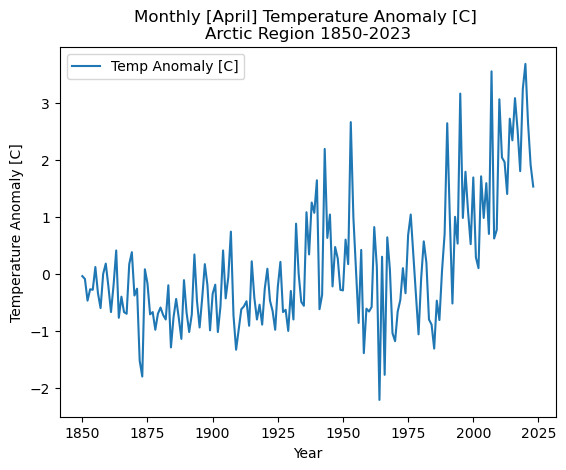

In [14]:
# Plot the data using pandas .plot() function
arctic_temp_df.plot(x='Year',
                    y='Temp Anomaly [C]',
                    title='Monthly [April] Temperature Anomaly [C] \nArctic Region 1850-2023',
                    xlabel='Year',
                    ylabel='Temperature Anomaly [C]')

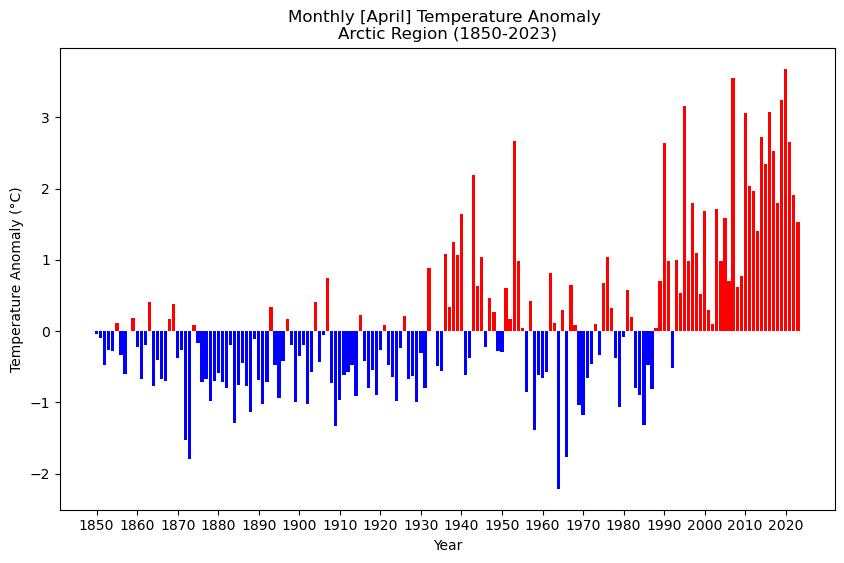

In [15]:
# From ChatGPT - How to plot this same data as a barplot and specify color,
# based on positive or negative anomaly.

# Define matplotlib figure and axis objects and figure size
fig, ax = plt.subplots(figsize=(10,6))

# Extracting relevant columns
years = arctic_temp_df['Year']
temperature_anomaly = arctic_temp_df['Temp Anomaly [C]']

# Create a bar plot with red for positive anomaly and blue for negative anomaly
colors = ['red' if anomaly > 0 else 'blue' for anomaly in temperature_anomaly]

# Plotting the bar chart
plt.bar(years, temperature_anomaly, color=colors)

# Show only every 10th year on the x-axis
plt.xticks(years[::10])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Monthly [April] Temperature Anomaly \nArctic Region (1850-2023)')

# Show the plot
plt.show()

## Plot description
Compared to the 1910-2000 average, the Acrtic Region is warming in April, particularly after 1990.

In [17]:
%%capture
%%bash
jupyter nbconvert arctic-temp-april.ipynb --to html